In [2]:
import numpy as np
import math
import scipy.integrate
import matplotlib.pyplot as plt
from scipy.optimize import minimize


/var/folders/2j/9ztj661j3z5g8lp6w9fd1lqc0000gn/T/ipykernel_8642/653999583.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


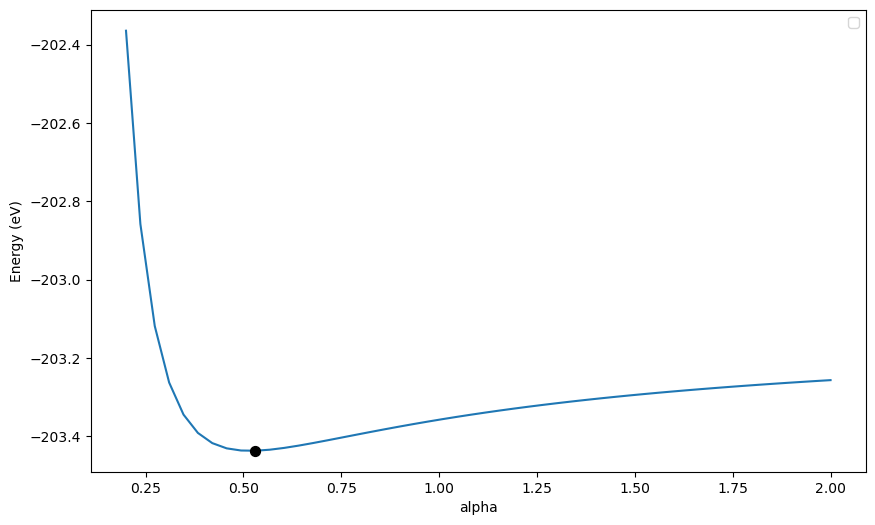

-203.4364474795303
0.5306122448979592


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Z = 3
scr_1 = 0.31
scr_2 = 1.67

ksi = Z - scr_1
zeta = Z / 2
eta = (Z - scr_2) / 2

zeta_prime = zeta / ksi
eta_prime = eta / ksi 
b = 1 + eta_prime
f = 1 + zeta_prime
K = (zeta_prime + eta_prime) / 2
g = 1 + K

alpha = np.linspace(0.2, 2, 50)  # Fixed spelling from "alphe" to "alpha"


def calculate_alpha_prime(alpha_val):
    return alpha_val / ksi

alpha_prime = calculate_alpha_prime(alpha)

def N_equation(alpha_val):
    alpha_p = calculate_alpha_prime(alpha_val)
    N = (np.pi ** 3) * ((3 * (alpha_p ** 2) / (eta_prime ** 5)) 
                       - (576 * (alpha_p ** 2) / (b ** 8)) 
                       + 384 * (alpha_p / (b ** 4 * f ** 3)) 
                       - 3 * (alpha_p / (K ** 4)) 
                       + (1 / (zeta_prime ** 3)) 
                       - (64 / f ** 6))
    return N

def L_equation(alpha_val):
    alpha_p = calculate_alpha_prime(alpha_val)
    L = (np.pi ** 3) * (
        3 * (2 * Z - (5/8)) * ((alpha_p ** 2) / eta_prime ** 5) 
        + (1.5 * Z - 3) * ((alpha_p ** 2) / eta_prime ** 4)
        + 3 * (alpha_p ** 2 / b ** 4) 
        + 6 * (alpha_p ** 2 / b ** 5) 
        + (516 - 384 * Z) * ((alpha_p ** 2) / b ** 7) 
        - 576 * Z * (alpha_p ** 2 / b ** 8)  # Added * operator
        - ((384 * alpha_p ** 2) / ((b ** 4) * (2 + b) ** 2))
        - (1152 * (alpha_p ** 2) / ((b ** 4) * (2 + b) ** 4))
        + (4 - 2 * Z) * (alpha_p / K ** 3) 
        - 4 * (alpha_p / g ** 3) 
        - 6 * (alpha_p ** 2 / g ** 4) 
        + (128 * Z - 256) * (alpha_p / (f ** 3 * b ** 3)) 
        + 192 * Z * (alpha_p / (b ** 4 * f ** 2)) 
        + (384 * Z - 384) * (alpha_p / (b ** 4 * f ** 3))
        + (128 * alpha_p) / (f ** 3 * (2 + b) ** 3) 
        + (384 * alpha_p) / (f ** 3 * (2 + b) ** 4) 
        + (1536 * alpha_p) / (f ** 3 * b ** 4 * (2 + f) ** 2) 
        + (1536 * alpha_p) / (f ** 2 * b ** 4 * (2 + f) ** 3) 
        + (128 * alpha_p) / (f ** 3 * (b + f) ** 3) 
        + (192 * alpha_p) / (f ** 2 * (b + f) ** 4)
        - 3 * (2 * Z - (5/8)) * (alpha_p / K ** 4) 
        + (2 * Z - (5/8)) * (1 / zeta_prime ** 3) 
        + (Z - 2) * (1 / zeta_prime ** 2) 
        + (2 / f ** 2) 
        + (2 / f ** 3) 
        + (20 - 64 * Z) * (1 / f ** 5) 
        + (128 - 64 * Z) * (1 / f ** 6) 
        - (512 / ((f ** 6) * (2 + f) ** 2)) 
        - (512 / ((f ** 5) * (2 + f) ** 3))
    )
    return L

# Fixed M_equation - added missing operators
def M_equation(alpha_val):
    alpha_p = calculate_alpha_prime(alpha_val)
    M = (np.pi ** 3) * (
        ((6 * alpha_p ** 2) / eta_prime ** 5) 
        + ((alpha_p ** 2) / eta_prime ** 2) 
        + ((384 * alpha_p ** 2) / b ** 7) 
        - ((576 * alpha_p ** 2) / b ** 8) 
        - 1152 * ((eta_prime * alpha_p ** 2) / b ** 8) 
        - 6 * (alpha_p / K ** 4) 
        - 3 * (zeta_prime * eta_prime * alpha_p / K ** 4) 
        - 128 * (alpha_p / (b ** 3 * f ** 3))
        + 384 * (alpha_p / (b ** 4 * f ** 3)) 
        + 2 * (alpha_p * zeta_prime / K ** 3)
        + 384 * (alpha_p * zeta_prime / (b ** 4 * f ** 3)) 
        + 384 * (alpha_p * eta_prime / (b ** 4 * f ** 3))
        + (2 / zeta_prime ** 3) 
        + (1 / zeta_prime) 
        - 128 * (zeta_prime / f ** 6) 
        - 64 * (1 / f ** 6)
    )
    return M

def energy(alpha_val):
    L_val = L_equation(alpha_val)
    M_val = M_equation(alpha_val)
    N_val = N_equation(alpha_val)
    
    E = -L_val**2 / (2 * M_val * N_val)
    
    return E

energy_array = np.vectorize(energy)(alpha)

min_y = np.min(energy_array * 27.211386)                # Lowest y value
min_x = alpha[np.argmin(energy_array * 27.211386)] 

plt.figure(figsize=(10, 6))
#plt.plot(alpha_prime, energy_array, color = 'pink', label = 'alpha prime')
plt.plot(alpha, energy_array * 27.211386)
plt.scatter(min_x, min_y, color='black', s=50, zorder=5)
plt.xlabel('alpha')
plt.ylabel('Energy (eV)')
plt.legend()
plt.show()

print(min_y)
print(min_x)

Two variational parameters

In [ ]:
Z = 3

def T_1s(x, y,Z):
    T1s = x ** 2 / 2
    return T1s
print(T_1s(x, y, Z))

NameError: name 'x' is not defined

In [5]:
def T_2s(x, y,Z):

    T2s = y ** 2 / 8
    return T2s
#print(T_1s(x, y))

In [6]:
def V_N1s(x, y, Z):

    VN1s = -Z * x

    return VN1s
#print(V_N1s(x, y, Z))

In [7]:
def V_N2s(x, y, Z):


    VN2s = -Z * y / 4
     
    return VN2s
#print(V_N1s(x, y, Z))

In [8]:
def V_1s1s(x, y, Z):
    
    V1s1s = (5 / 8) * x
    
    return V1s1s
#print(V_N1s(x, y, Z))

In [9]:
def V_1s2s(x, y, Z):
   
    V1s2s = (x * y) * (y ** 4 + (10 * x * (y ** 3)) + (8 * (x ** 4)) + (20 * (x** 3) * y) + (12 * (x ** 2) * (y ** 2))) / ((2 * x + y) ** 5)
    
    return V1s2s
#print(V_N1s(x, y, Z))

In [10]:
def T_1s2s(x, y, Z):
   
    T1s2s = -4 * (2 ** (1/2)) * (x ** (5/2)) * (y ** (5/2)) * ((y - (4 * x))/ ((2* x + y) ** 4) )
 
    return T1s2s
#print(V_N1s(x, y, Z))

In [11]:
def V_N1s2s(x, y, Z):
  
    VN1s2s = -Z * 4 * (2 ** (1/2)) * (x ** (3/2)) * (y ** (3/2)) * ((2 * x - y)/ ((2* x + y) ** 3) )

    return VN1s2s
#print(V_N1s(x, y, Z))

In [12]:
def V_1112(x, y, Z):

    V1112 = 32 * (2 ** (1/2)) * ((x ** (5/2)) * (y ** (3/2))) * (((-y) ** 4) + (-21 * x * (y ** 3)) + (264 * x ** 4) + (-28 * (x ** 3) * y) + (-86 * (x ** 2) * (y ** 2))) / (((2 * x + y) ** 3) * (y + 6 * x) ** 4)

    return V1112
#print(V_N1s(x, y, Z))def V_1112(x, y, Z):

In [13]:
def V_1212(x, y, Z):

    V1212 = 16 * (x ** 3 * y ** 3) * ((13 * y ** 2) + (-30 * x * y) + (20 * x ** 2))/ ((2 * x + y) ** 7)
    return V1212
#print(V_N1s(x, y, Z))

In [14]:
def S_1s2s(x, y, Z):
    
    S1s2s = 32 * (2 ** (1/2)) * (x ** (3/2)) * (y ** (3/2)) * ((x - y)/ ((2* x + y) ** 4) )
    return S1s2s


In [15]:
def Energy_2param(x, y, Z):
    energy = (2 * T_1s(x, y, Z) + T_2s(x,y,Z) - (T_1s(x,y,Z) * (S_1s2s(x,y,Z) ** 2)) - (2 * T_1s2s(x,y,Z) * S_1s2s(x,y,Z)) + 2 * V_N1s(x,y,Z) + V_N2s(x,y,Z) - V_N1s(x,y,Z) * (S_1s2s(x,y,Z)**2) - 2 * V_N1s2s(x,y, Z) * S_1s2s(x,y,Z) + 2 * V_1s2s(x,y,Z) + V_1s1s(x,y,Z) + 2*V_1112(x,y,Z) * S_1s2s(x,y,Z) - V_1212(x,y,Z)) / (1 - S_1s2s(x,y,Z) ** 2)
    return energy
print(Energy_2param(x, y, Z))

NameError: name 'x' is not defined

/var/folders/2j/9ztj661j3z5g8lp6w9fd1lqc0000gn/T/ipykernel_8642/3154729440.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


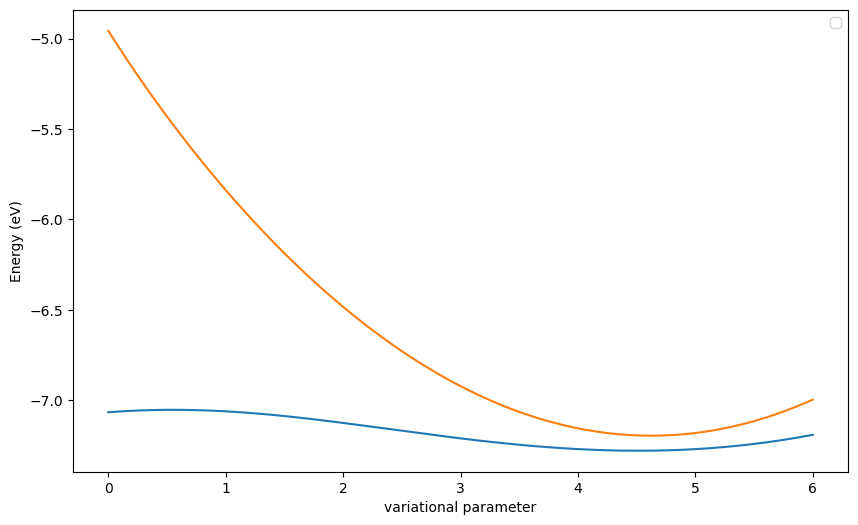

-6.8844333
-7.13848568
-7.279102781293805
-7.195921379377558


In [16]:
Energy_y2 = [-1.00000000e+00, -1.31996043e+00, -1.31612632e+00, -1.20805267e+00,
 -1.85717877e+00, -2.88174317e+00, -3.67992431e+00, -4.26961118e+00,
 -4.73739864e+00, -5.13070509e+00, -5.47247788e+00, -5.77409033e+00,
 -6.04141332e+00, -6.27756366e+00, -6.48420427e+00, -6.66219715e+00,
 -6.81195081e+00, -6.93361468e+00, -7.02719207e+00, -7.09260759e+00,
 -7.12974783e+00, -7.13848568e+00, -7.11869463e+00, -7.07025649e+00,
 -6.99306526e+00, -6.88702835e+00 ,-6.75206640e+00, -6.58811222e+00,
 -6.39510935e+00, -6.17301047e+00, -5.92177586e+00, -5.64137198e+00,
 -5.33177018e+00, -4.99294564e+00, -4.62487647e+00, -4.22754300e+00,
 -3.80092714e+00, -3.34501197e+00, -2.85978138e+00, -2.34521979e+00,
 -1.80131197e+00, -1.22804292e+00, -6.25397747e-01 , 6.63836859e-03,
  6.68080205e-01 , 1.35894251e+00 , 2.07924002e+00,  2.82898739e+00,
  3.60819925e+00 , 4.41689012e+00]

Energy_x2 = [-6.75   ,    -6.77092559, -6.76450477, -6.73398607 ,-6.69071102, -6.64661881,
 -6.61114456, -6.59010184, -6.58570144 ,-6.59724154, -6.62207626 ,-6.65655413,
 -6.69674901, -6.7389328,  -6.77982069, -6.81665278, -6.84717617, -6.86957679,
 -6.88239358, -6.8844333 , -6.87469514, -6.85230781, -6.81647954 ,-6.76645917,
 -6.70150673, -6.62087161, -6.52377664, -6.40940683, -6.27690193, -6.12535178,
 -5.95379427, -5.76121534, -5.54655091, -5.30869064, -5.04648347, -4.75874504,
 -4.4442669,  -4.10182784, -3.73020719, -3.3282003 , -2.89463625 ,-2.42839772,
 -1.92844305, -1.39383031, -0.8237431 , -0.21751783 , 0.42532797 , 1.10506707,
  1.82173418 , 2.57509885]

plt.figure(figsize=(10, 6))
#plt.plot(alpha_prime, energy_array, color = 'pink', label = 'alpha prime')
#plt.plot(np.linspace(0, 6, 50), Energy_y2) # y = 2 and x is varied
#plt.plot(np.linspace(0, 6, 50), Energy_x2) # x = 2 and y is varied
plt.plot(np.linspace(0, 6, 200), Energy_2param(2.6797, np.linspace(1, 3, 200), Z))
plt.plot(np.linspace(0, 6, 200), Energy_2param(np.linspace(1, 3, 200), 1.8683, Z))
plt.xlabel('variational parameter')
plt.ylabel('Energy (eV)')
plt.legend()
plt.show()

energy_minyvar = np.min(Energy_x2)
energy_minxvar = np.min(Energy_y2)
energy_minxacc = np.min(Energy_2param(2.6797, np.linspace(1, 3, 200), Z))
energy_minyacc = np.min(Energy_2param(np.linspace(1, 3, 200), 1.8683, Z))
print(energy_minyvar) # x = 2
print(energy_minxvar) # y = 2
print(energy_minxacc) # x = 2.6797
print(energy_minyacc) # y = 1.8683

In [17]:
x = np.linspace(1, 3, 50)
y = np.linspace(1, 3, 50) 
X, Y = np.meshgrid(x, y)
E = Energy_2param(X, Y, Z)
idx = np.unravel_index(np.argmin(E), E.shape)

x_opt = X[idx]
y_opt  = Y[idx]
E_min     = E[idx]

print(x_opt, y_opt, E_min * 27.211386)

2.5510204081632653 2.4693877551020407 -198.4104234655931


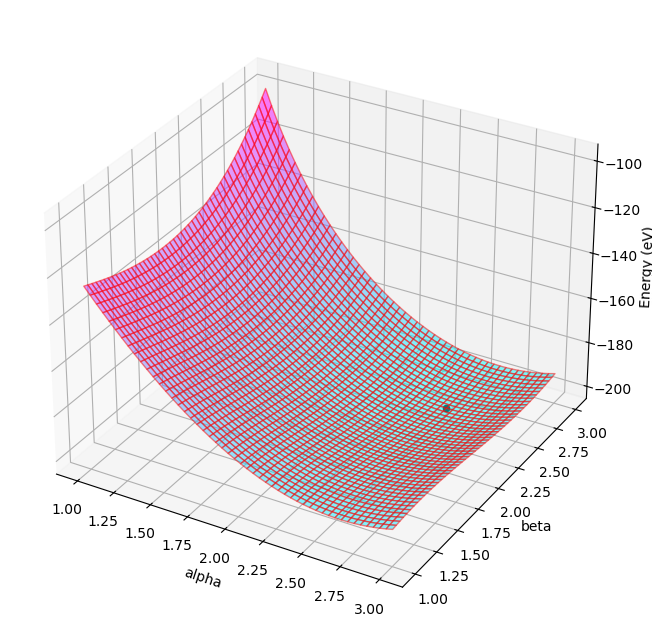

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter(x_opt, y_opt, E_min * 27.211386, color= "black", zorder= 10, depthshade = False)
ax.plot_surface(X, Y, E * 27.211386, cmap='cool', alpha=0.5, color="red", zorder = 1)

#plt.scatter(x_opt, y_opt, E, color="red")
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('Energy (eV)')

plt.show()